In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/경기도 빅데이터 자료/화이팅하조 팀프로젝트/only 서울 경기만.csv",engine='python')

In [3]:
df.head()

,산코드_번호,구간_일련번호,산 위치,산 명,구간_거리,구간_상행시간,구간_하행시간,구간_난이도,시작_표고?,끝_표고값,표고 차,경사도
0,2217021100,2.217020e+13,경기도 가평군 북면,석용산,3350,93,65,2,1048,381.0,667.0,19.910448
1,2217021100,2.217020e+13,경기도 가평군 북면,석용산,2055,72,50,2,411,924.0,513.0,24.963504
2,2217021100,2.217020e+13,경기도 가평군 북면,석용산,3798,106,74,2,1048,411.0,637.0,16.771985
3,2217021100,2.217020e+13,경기도 가평군 북면,석용산,2290,80,56,2,400,924.0,524.0,22.882096
4,2217021100,2.217020e+13,경기도 가평군 북면,석용산,5273,102,72,2,695,1141.0,446.0,8.458183


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df['총시간'] = df.구간_상행시간 + df.구간_하행시간

In [6]:
df['왕복거리'] = df.구간_거리*2

Text(0,0.5,'LEN')

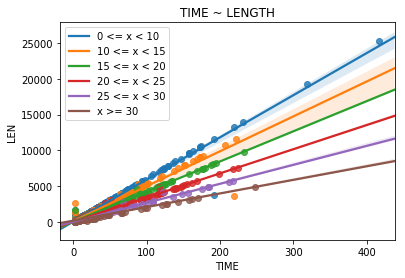

In [7]:
# 경사도에 따른 회귀선 그래프
# 몇몇의 이상치를 재외하면 그래프가 특정한 선형을 이루는 것을 알 수 있다.

sns.regplot(x='총시간',y='왕복거리',data=df[(df.경사도>=0)&(df.경사도<10)])

sns.regplot(x='총시간',y='왕복거리',data=df[(df.경사도>=10)&(df.경사도<15)])

sns.regplot(x='총시간',y='왕복거리',data=df[(df.경사도>=15)&(df.경사도<20)])

sns.regplot(x='총시간',y='왕복거리',data=df[(df.경사도>=20)&(df.경사도<25)])

sns.regplot(x='총시간',y='왕복거리',data=df[(df.경사도>=25)&(df.경사도<30)])

sns.regplot(x='총시간',y='왕복거리',data=df[df.경사도>=30])

plt.legend(('0 <= x < 10', '10 <= x < 15', '15 <= x < 20', '20 <= x < 25', '25 <= x < 30','x >= 30'))
plt.title("TIME ~ LENGTH")
plt.xlabel("TIME")
plt.ylabel('LEN')

In [8]:
df1 = df[(df.경사도>=0)&(df.경사도<10)]
df2 = df[(df.경사도>=10)&(df.경사도<15)]
df3 = df[(df.경사도>=15)&(df.경사도<20)]
df4 = df[(df.경사도>=20)&(df.경사도<25)]
df5 = df[(df.경사도>=25)&(df.경사도<30)]
df6 = df[df.경사도>30]

In [9]:
# 경사도에 따라 나눈 총시간 ~ 왕복거리의 상관관계를 파악한다
# 몇개의 이상치를 빼면 특정 회귀식으로 0.9이상의 확률로 해당 자료를 설명할 수 있다.
# 경사도 0이상 10미만의 데이터로 처리한 결과

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm
import scipy as sp


In [10]:
my_fml = '왕복거리 ~ 총시간'
lm = ols(my_fml, data = df1).fit()
lm.summary()
lm.rsquared

0.9783465464938508

In [11]:
df_easy = df[df.구간_난이도==3]

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=3, algorithm='auto')
model.fit(df_easy[['총시간','왕복거리','경사도']])
predict = pd.DataFrame(model.predict(df_easy[['총시간','왕복거리','경사도']]))
predict.columns=['predict']

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
r = pd.concat([df_easy[['총시간','왕복거리','경사도']],predict],axis=1)

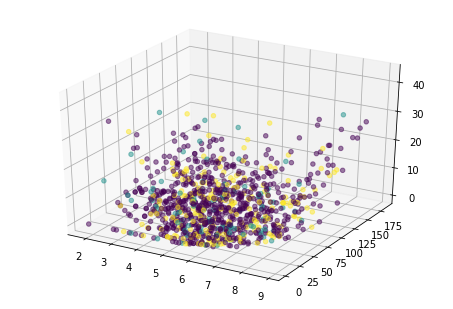

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.log(r.왕복거리),r.총시간,r.경사도,c=r.predict,alpha=0.5)

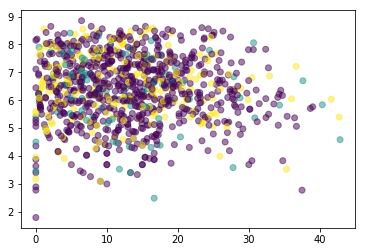

In [18]:
plt.scatter(r.경사도,np.log(r.왕복거리),c=r.predict,alpha=0.5)

In [19]:
model1 = KMeans(n_clusters=5, algorithm='auto')
model1.fit(df_easy[['총시간','왕복거리']])
predict1 = pd.DataFrame(model1.predict(df_easy[['총시간','왕복거리']]))
predict1.columns=['predict']

In [20]:
r1 = pd.concat([df_easy[['총시간','왕복거리']],predict1],axis=1)

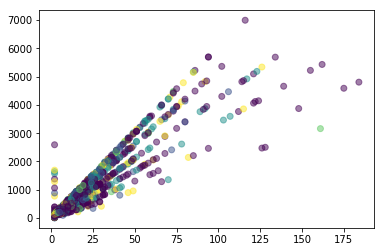

In [21]:
plt.scatter(r1.총시간,r1.왕복거리,c=r1.predict,alpha=0.5)

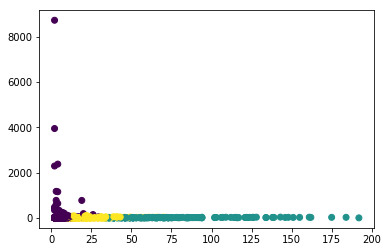

In [22]:
from sklearn.cluster import SpectralClustering
model2 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',assign_labels = 'kmeans')

labels = model2.fit_predict(df_easy[['총시간','왕복거리','경사도']])
plt.scatter(df_easy.총시간,df_easy.경사도, c=labels)

In [23]:
df_easy['평균속력']=df_easy.왕복거리/df_easy.총시간

C:\Users\user\AppData\Local\conda\conda\envs\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
df_easy.head()

,산코드_번호,구간_일련번호,산 위치,산 명,구간_거리,구간_상행시간,구간_하행시간,구간_난이도,시작_표고?,끝_표고값,표고 차,경사도,총시간,왕복거리,평균속력
5,2217021100,2.217020e+13,경기도 가평군 북면,석용산,1076,21,15,3,349,400.0,51.0,4.739777,36,2152,59.777778
6,2217021100,2.217020e+13,경기도 가평군 북면,석용산,451,9,6,3,411,400.0,11.0,2.439024,15,902,60.133333
8,2217021100,2.217020e+13,경기도 가평군 북면,석용산,717,16,11,3,1144,1048.0,96.0,13.389121,27,1434,53.111111
9,2217021100,2.217020e+13,경기도 가평군 북면,석용산,356,7,5,3,1141,1144.0,3.0,0.842697,12,712,59.333333
10,2107031700,2.107030e+13,경기도 광주시 도척면,정광산,2412,54,38,3,108,431.0,323.0,13.391376,92,4824,52.434783


In [24]:
df_easy_sort = df_easy[(df_easy.경사도<=100)&(df_easy.평균속력<=80)]

In [25]:
model2 = KMeans(n_clusters=6, algorithm='auto')
model2.fit(df_easy_sort[['총시간','왕복거리','경사도']])
predict2 = pd.DataFrame(model.predict(df_easy_sort[['총시간','왕복거리','경사도']]))
predict2.columns=['predict2']

In [26]:
r2 = pd.concat([df_easy_sort[['총시간','왕복거리','경사도']],predict2],axis=1)

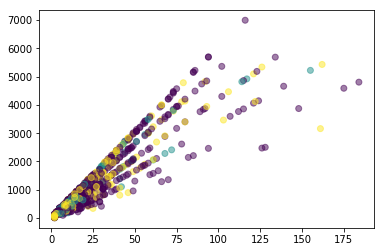

In [27]:
plt.scatter(r2.총시간,r2.왕복거리,c=r2.predict2,alpha=0.5)

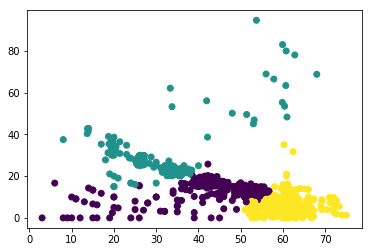

In [38]:
model3 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',assign_labels = 'kmeans')

labels = model3.fit_predict(df_easy_sort[['경사도','평균속력']])
plt.scatter(df_easy_sort.평균속력,df_easy_sort.경사도, c=labels)

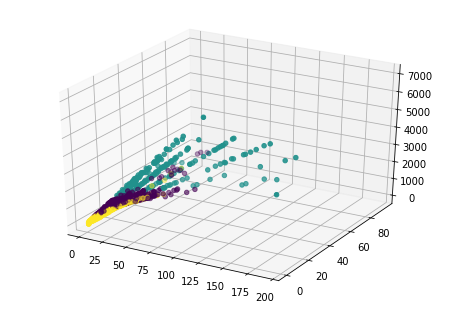

In [70]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_easy_sort.총시간,df_easy_sort.경사도,df_easy_sort.왕복거리, c=labels)

In [39]:
data = pd.read_excel("C:/Users/user/Desktop/경기도 빅데이터 자료/화이팅하조 팀프로젝트/데이터 쉬움만.xlsx")

In [40]:
data.head(10)

,산코드_번호,구간_일련번호,구간_거리,구간_상행시간,구간_하행시간,속력,구간_난이도,시작_표고값,끝_표고값,표고 차,경사도,산 위치,산 명
0,2802011100,28020111000024,3394,1,1,3394.0,3,766,524.0,242.0,7.130230,경상남도 거창군,수도산
1,2802011100,28020111000025,2026,1,1,2026.0,3,637,742.0,105.0,5.182626,경상남도 거창군,수도산
2,1304461400,13044614000027,1782,1,1,1782.0,3,633,635.0,2.0,0.112233,대구광역시 동구 공산1동,환성산
3,2819072400,28190724000028,1773,1,1,1773.0,3,235,237.0,2.0,0.112803,경상남도 함양군 안의면,황석산
4,2819072400,28190724000024,1732,1,1,1732.0,3,237,203.0,34.0,1.963048,경상남도 함양군 안의면,황석산
5,2812402300,28124023000024,1625,1,1,1625.0,3,249,60.0,189.0,11.630769,경상남도 진주시 집현면,집현산
6,1202990300,12029903000025,1414,1,1,1414.0,3,339,352.0,13.0,0.919378,부산광역시 기장군,아홉산
7,2214211300,22142113000028,1371,1,1,1371.0,3,1435,1204.0,231.0,16.849015,강원도 태백시 문곡소도동,태백산_장군봉
8,2599990500,25999905000025,1340,1,1,1340.0,3,107,336.0,229.0,17.089552,전라북도 전주시,고덕산
9,2101073500,21010735000024,1296,1,1,1296.0,3,559,380.0,179.0,13.811728,경기도 가평군 외서면,호명산


In [48]:
Q1 = data.속력.describe()['25%']
Q3 = data.속력.describe()['75%']
IQR = Q3-Q1
min_lim = Q1-IQR
max_lim = Q3+IQR

In [49]:
data1 = data[(data.속력>=min_lim)&(data.속력<=max_lim)]

In [51]:
data1.tail(10)

,산코드_번호,구간_일련번호,구간_거리,구간_상행시간,구간_하행시간,속력,구간_난이도,시작_표고값,끝_표고값,표고 차,경사도,산 위치,산 명
14408,1605270200,16052702000432,6,1,1,6.0,3,182,182.0,0.0,0.0,대전광역시 중구 산서동,보문산
14409,2404130900,24041309000010,6,1,1,6.0,3,180,180.0,0.0,0.0,충청남도 논산시 부적면,대명산
14410,1410530100,14105301000011,6,1,1,6.0,3,250,250.0,0.0,0.0,인천광역시 중구 영종동,백운산
14411,2501121000,25011210000048,6,1,1,6.0,3,308,308.0,0.0,0.0,전라북도 고창군,선운산_도솔봉
14412,2509150200,25091502000087,6,1,1,6.0,3,103,103.0,0.0,0.0,전라북도 익산시 삼기면,미륵산
14413,1214990100,12149901000088,6,1,1,6.0,3,112,112.0,0.0,0.0,부산광역시 영도구,봉래산
14414,1307060200,13070602000173,6,1,1,6.0,3,85,85.0,0.0,0.0,대구광역시 수성구 황금동,무학산
14415,2613581000,26135810000018,6,1,1,6.0,3,141,141.0,0.0,0.0,전라남도 여수시 화정면,망마산
14416,1203991300,12039913000065,6,1,1,6.0,3,266,266.0,0.0,0.0,부산광역시 기장군,일광산
14417,1304461200,13044612000227,6,1,1,6.0,3,621,621.0,0.0,0.0,대구광역시 동구 공산1동,팔공산_비로봉


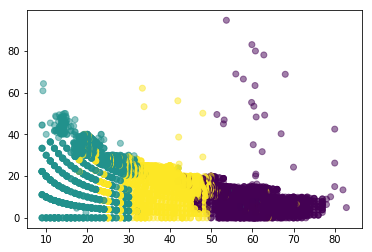

In [62]:
K_model = KMeans(n_clusters=3, algorithm='auto')
K_model.fit(data1[['속력','경사도']])
predict = pd.DataFrame(K_model.predict(data1[['속력','경사도']]))
predict.columns=['predict']
r = pd.concat([data1[['속력','경사도']],predict],axis=1)
plt.scatter(r.속력,r.경사도,c=r.predict,alpha=0.5)

In [71]:
r = pd.concat([data1[['속력','경사도','구간_거리']],predict],axis=1)

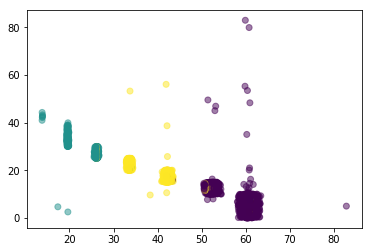

In [87]:
plt.scatter(r.속력[r.구간_거리>=500],r.경사도[r.구간_거리>=500],c=r.predict[r.구간_거리>=500],alpha=0.5)


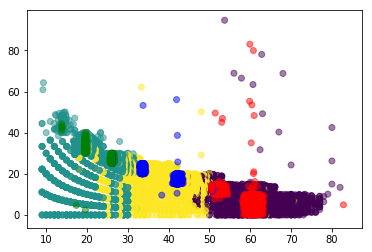

In [91]:
plt.scatter(r.속력[r.구간_거리<500],r.경사도[r.구간_거리<500],c=r.predict[r.구간_거리<500],alpha=0.5)
plt.scatter(r.속력[r.구간_거리>=500],r.경사도[r.구간_거리>=500],c=r.predict[r.구간_거리>=500],alpha=0.5)


In [86]:
r.predict[r.구간_거리>=500] = r.predict[r.구간_거리>=500]+3

In [90]:
r.predict[r.predict==3.0] = 'r'
r.predict[r.predict==4.0] = 'g'
r.predict[r.predict==5.0] = 'b'

In [95]:
test = pd.read_csv("C:/Users/user/Desktop/경기도 빅데이터 자료/화이팅하조 팀프로젝트/경기도 902개.csv",engine='python')

In [100]:
train = pd.read_csv("C:/Users/user/Desktop/경기도 빅데이터 자료/화이팅하조 팀프로젝트/final mountain2.csv",engine='python')

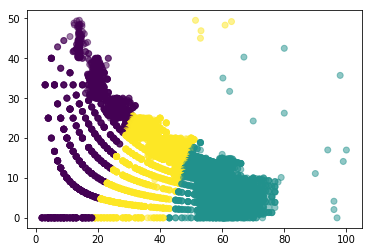

In [101]:
K_model = KMeans(n_clusters=3, algorithm='auto')
K_model.fit(train[['속력','경사도']])
predict = pd.DataFrame(K_model.predict(train[['속력','경사도']]))
predict.columns=['predict']
r = pd.concat([train[['속력','경사도']],predict],axis=1)
plt.scatter(r.속력,r.경사도,c=r.predict,alpha=0.5)

In [103]:
test = test[test.속력 <=100]

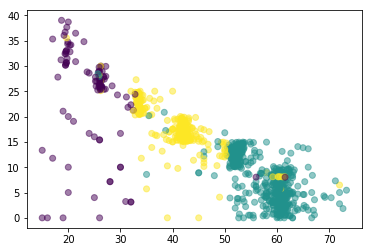

In [104]:
predict = pd.DataFrame(K_model.predict(test[['속력','경사도']]))
predict.columns=['predict']
r1 = pd.concat([test[['속력','경사도']],predict],axis=1)
plt.scatter(r1.속력,r1.경사도,c=r1.predict,alpha=0.5)

In [105]:
test.columns

Index(['산코드_번호', '구간_일련번호', '구간_거리', '구간_상행시간', '구간_하행시간', '속력', '구간_난이도',
       '시작_표고값', '끝_표고값', '표고 차', '경사도', '산 위치', '산 명'],
      dtype='object')

In [106]:
test = pd.concat([test,r1.predict])

C:\Users\user\AppData\Local\conda\conda\envs\venv\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [107]:
test.columns

Index([ '산코드_번호', '구간_일련번호',   '구간_거리', '구간_상행시간', '구간_하행시간',      '속력',
        '구간_난이도',  '시작_표고값',   '끝_표고값',    '표고 차',     '경사도',    '산 위치',
           '산 명',         0],
      dtype='object')

In [112]:
test = test.drop(0,axis=1)

In [113]:
test['군집분류']=r1.predict

In [129]:
bf = pd.read_csv("C:/Users/user/Desktop/경기도 빅데이터 자료/화이팅하조 팀프로젝트/무장애길.csv",engine='python')

In [130]:
bf.columns

Index(['이름', '속력', '경사'], dtype='object')

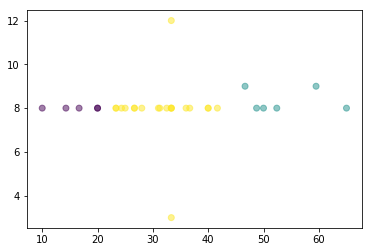

In [131]:
predict = pd.DataFrame(K_model.predict(bf[['속력','경사']]))
predict.columns=['predict']
r2 = pd.concat([bf[['속력','경사']],predict],axis=1)
plt.scatter(r2.속력,r2.경사,c=r2.predict,alpha=0.5)

In [134]:
r2.predict[r2.predict==0.0]='r'
r2.predict[r2.predict==1.0]='k'
r2.predict[r2.predict==2.0]='b'

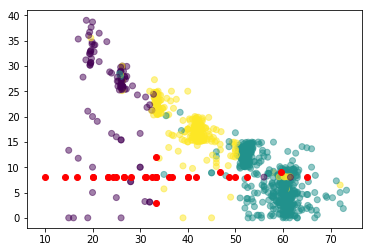

In [137]:
plt.scatter(r1.속력,r1.경사도,c=r1.predict,alpha=0.5)
plt.scatter(r2.속력,r2.경사,c='r')